## Importing the libraries


In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('D:/VIT/SEM 4/CSE3008/ML Lab 7/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:>

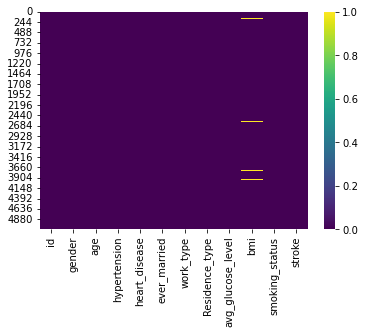

In [5]:
sns.heatmap(df.isnull(),cbar=True,cmap='viridis')

In [6]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
df['bmi'].mode()

0    28.7
dtype: float64

In [8]:
df['bmi']=df['bmi'].fillna(df['bmi'].mode()[0])

In [9]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
df.drop(['id'],axis=1,inplace=True)

In [11]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
def change(col):
    if col=='Male':
        return 1
    elif col=='Female':
        return 0
df['gender']=df['gender'].apply(change)

In [13]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0.0,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,1.0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,0.0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,0.0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
le1 = LabelEncoder()
df['ever_married']=le1.fit_transform(df['ever_married'])
le2 = LabelEncoder()
df['work_type']=le2.fit_transform(df['work_type'])
le3 = LabelEncoder()
df['Residence_type']=le3.fit_transform(df['Residence_type'])
le4 = LabelEncoder()
df['smoking_status']=le4.fit_transform(df['smoking_status'])

In [15]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0.0,61.0,0,0,1,3,0,202.21,28.7,2,1
2,1.0,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0.0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0.0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [16]:
def checkNAN():
    i=0
    for column in df.columns:
        if i not in [1,7,8]:
            print(df[column].unique())
        i += 1
checkNAN()

[ 1.  0. nan]
[0 1]
[1 0]
[1 0]
[2 3 0 4 1]
[1 0]
[1 2 3 0]
[1 0]


In [17]:
df[df['gender'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,NaN,26.0,0,0,0,2,0,143.33,22.4,1,0


In [18]:
df.drop(index=df.index[3116],axis=0,inplace=True)

In [19]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
classifier = KNeighborsClassifier(n_neighbors = 5,metric='minkowski',p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
y_pred = classifier.predict(X_test)

In [25]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[965   3]
 [ 53   1]]


0.9452054794520548